#Predicting College Admission with Binary Classifiers

By: Michelle Badalov, Tamar Kellner, Zeynep Yilmazcoban, and Saima Ahmed

#Introduction

For our final project, we will attempt to predict chances of university admissions. The data we will be using is the "Data for Admission in the University" dataset from Kaggle. You can check it out from this link: https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university.

#Motivation

Our main motivation is the financial burden of college applications on students. College Board recommends students to apply to 5 to 8 colleges. On average, the cost of one application is around 50 \$ and can go as high as 80 \$. This can add up to a total cost of 250\$ - 640\$ which is a lot to handle for a high school student. As we all know, college admissions can be tricky and stressful. Although students can roughly have an idea about their chances of being admitted to a particular university, decisions are often unexpected. Having a more accurate way to predict chances of admissions can help students make better decisions while deciding which schools to apply to, thus maximize their chances with the cost they pay.

To learn more about how the College Board suggests students should narrow down the list of schools they will apply to, visit https://counselors.collegeboard.org/college-application/how-many.


#Binary Classification

Binary classification is one of the most popular implementations of machine learning. It is a supervised learning algorithm which classifies a set of examples into two groups or classes. The prediction is based on a the chosen binary classification algorithm. We will explore several of these algorithms such as:
1. Logistic Regression
2. K-Nearest Neighbors
3. Decision Tree Classifier 

Our problem can easily be cast as a binary classification task.

Our dataset includes a 'Chance of Admit' column which represents the probability that a student will be granted admission to the university. 
We can map these percentages to another column which marks a row as 0 if the percentage is less than 0.5, and 1 otherwise, where 0 represents that the student is unlikely to be admitted and 1 is the contrary. 

Binary Classification has a broad scope of applications beyond admissions statistics. This includes, but is not limited to email spam classification, credit card fraud, quality control, and more. 

To learn more about Binary Classification check out:

https://www.sciencedirect.com/topics/computer-science/binary-classification




###Preparing the dataset

In this step, we will adjust and prepare our dataset so that we can apply our algorithms and produce the most accurate results. 
To assist us with preprocessing, we load the following packages:

In [30]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We then import our data using pandas' read_csv function. 
To make our lives easier, we first trim any following white space from the column names. Then, we create our truth column, y, which filters the "Chance of Admit" column so that it represents whether students have >= 50% chance of admission. The dataset includes a "Serial No." column which we will be dropping since it is irrelevant. Later, we also drop the 'Chance of Admit' column from the input data as it represents the true class.  

In [31]:
df = pd.read_csv('./drive/MyDrive/422 Final Project/adm_data.csv')

# Deletes space after column names
df.rename(columns = {'Chance of Admit ':'Chance of Admit', 'LOR ':'LOR'}, inplace = True)

# Adds binary column which represents whether student has >=50% of admission. 
y = np.where(df['Chance of Admit'] > 0.5, 1, 0)

# Drops irrelevant serial number attribute. 
X = df.drop(columns=['Serial No.'])


Now that our dataset is cleaned and organized, we can split it into test and training. We use the train_test_split function from sklearn to do this.

This function will give us our full X training data, full X test data, y training data, and y test data.

In [32]:
from sklearn.model_selection import train_test_split

To perform some brief optimization on the hold out threshold, we tested the performance of logistic regression on various hold out ratios. As seen in the plot of accuracies below, a threshold of 0.4 yields the best performance. Therefore, we will set our hold out ratio to 0.4 for the rest of the tutorial. 

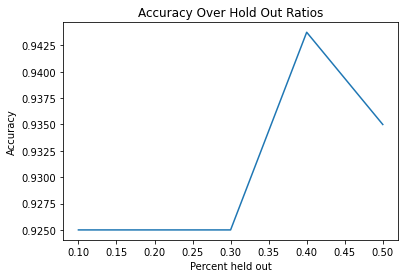

In [33]:
from sklearn.linear_model import LogisticRegression

hold = [0.1, 0.2, 0.3, 0.4, 0.5]

acc = []
for p in hold:
  XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=p, random_state=42)

  XTrain = XTrain.drop(columns=['Chance of Admit'])
  XTest = XTest.drop(columns=['Chance of Admit'])
  # Fits logistic regression model to training data.
  clf = LogisticRegression(solver='lbfgs', max_iter=500).fit(XTrain, yTrain)

  acc.append(clf.score(XTest, yTest))

# Plot to compare the model's predicted probabilities vs. the data's given probabilities. 
plt.plot(hold, acc)

plt.xlabel("Percent held out")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Hold Out Ratios")
plt.show()

XTrain_full, XTest_full, yTrain, yTest = train_test_split(X, y, test_size=p, random_state=42)

XTrain = XTrain_full.drop(columns=['Chance of Admit'])
XTest = XTest_full.drop(columns=['Chance of Admit'])

Note that the random_state parameter is set to 42 so that the shuffling is controlled and we get consistent results.


Now, we can get to work and start predicting!

###Logistic Regression
The first algorithm we will go over in this tutorial is Logistic Regression. 

Logistic regression is used to model relationships between the qualitative target variable and the relevant independent variables. In fact, the logarithmic likelihood of an outcome is a linear combination of the input. In the binary case, the target variable will only be able to take on one of two values, 0 or 1. For this project, 1 represents that the student is likely to be admitted where 0 means they are not.

A more detailed explanation of Logistic Regression as a Binary Classifier can be found at:

https://towardsdatascience.com/binary-classification-and-logistic-regression-for-beginners-dd6213bf7162

To begin with your logistic regression model, you will want to import the following sklearn packages. 

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

The LogisticRegression class implements logistic regression using various libraries and solvers. Further, this class applies regularization as a default and can handle both dense and sparse input. 

Sklearn's confusion_matrix class will assist us in evaluting the accuracy of our models by creating a confusion matrix.

Now we can actually train the model. Thanks to sklearn, this process can be done in just one line!

In [35]:
# Fits logistic regression model to training data.
clf = LogisticRegression(solver='lbfgs', max_iter=500).fit(XTrain, yTrain)

The variable clf holds our fitted logistic regression model! We use the default solver and increase the max_iterations to 500 because the solver does not converge for a lower number of iterations. 

To expand on this a bit more, if the solver is returning an error that is barely changing between iterations, this means that the algorithm has reached a solution and converged. 

However, if the errors are significantly varying, this means that the algorithm did not converge. 

For more information, see:

https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter

Let us now observe the performance of this model. 

In [36]:
print("Accuracy: ")
print(clf.score(XTest, yTest))

Accuracy: 
0.935


Amazing! Despite being so easy to implement, the model has almost a 94% accuracy! Pretty good if you ask us, but there's certainly room for improvement. The goal is, of course, to reach as close to 100% accuracy as possible. 

Let's see if we can get any more insights on our performance using a confusion matrix. 

To create the matrix itself is quite simple, also only consisting of one line.

In [37]:
# Creates confusion matrix based on model predictions.
cm = confusion_matrix(yTrain, clf.predict(XTrain))

Sklearn's confusion_matrix creates a matrix for the training data for us, taking in just our target training data as well as our predictions. 

The following code allows us to visualize this matrix.  

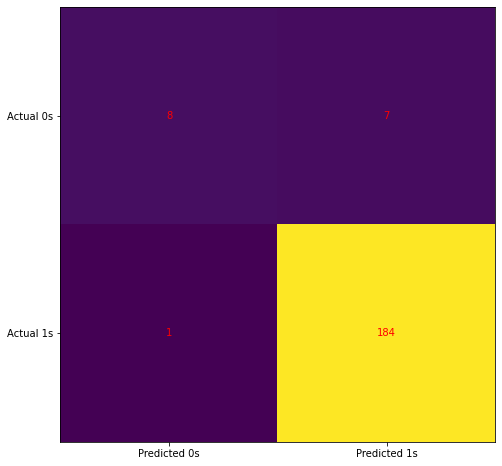

In [38]:
# Plots confusion matrix. 
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Now we know the actual number of correct and incorrect predictions for both classes. We can see that the amount of data for class 0 is much less than for class 1. Further, 0's are being predicted as 1's more often than they are classified correctly. 

A potential improvement on this is using more examples of students who are unlikely to be admitted. 


If you're still having a hard time understanding the purpose of a confusion matrix, check out Toward Data Science's great overview:

https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

As a little experiment on Logistic Regression, we wanted to compare the model's predicted 'Chance of getting in' with our true 'Chance of Admission'. 

Sklearn uses a one-vs-rest approach for a binary scenario like this. According to scikit-learn.org, LogisticRegression's predict_proba function 'calculates the probability of each class assuming it to be positive using the logistic function'. These values are also normalized.

Documentation on LogisticRegression's predict_proba function can be found at:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

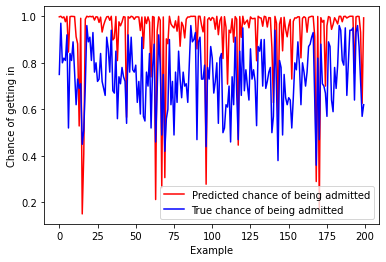

In [39]:
# Model's predicted probabilities. 
PTrain_plt = pd.DataFrame(clf.predict_proba(XTrain), columns = ['Chance not get in','Chance get in'])

# True probability. 
PTrue_plt = XTrain_full['Chance of Admit'].reset_index()


indices = range(0, len(PTrue_plt))

# Plot to compare the model's predicted probabilities vs. the data's given probabilities. 
plt.plot(indices, PTrain_plt['Chance get in'], color = "red", label = "Predicted chance of being admitted")

plt.plot(indices, PTrue_plt['Chance of Admit'], color = "blue", label = "True chance of being admitted")

plt.xlabel("Example")
plt.ylabel("Chance of getting in")

plt.legend()
plt.show()

As we can see here, the model's predicted probabilities are much more drastic than our true values. 

Though we are not sure why this is, it is important to note that as long as the predictions are on the correct side of the 0.5 threshold, the model will the classifying correctly in a **binary case**.

For more information and examples of using Logistic Regression check out: 

https://towardsdatascience.com/binary-classification-and-logistic-regression-for-beginners-dd6213bf7162

# KNN

The second binary classification algorithm we will implement is K-Nearest Neighbors or KNN. Similar to logistic regression, we will use KNeigborsClassifier from sklearn for this algorithm. 



KNN is another supervised learning classifier and it uses proximity to make classifications or predictions about the grouping of a particular data point. An important value that needs to be picked for KNN is k, the number of neighbors. Value of k depends on the dataset and different k values result in different accuracies. 

To figure out the best k value that will result in highest accuracy for our particular dataset, we decided to use a simple for loop. The loop tries out every k value from 1 to 9 and picks the value that produces the highest accuracy. 

To compute training and test data accuracy, we used the score function again. The parameters are set to XTrain and yTrain for training accuracy and XTest and yTest for test accuracy. After trying all the values, we achieved an accuracy of 93% when k=3. This is slightly lower than our logistic regression accuracy (94%!) but we are still happy with the result!

More information on the K-Nearest Neighbors algorithm can be found at:


https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4

In [40]:
from sklearn.neighbors import KNeighborsClassifier

best_knn = KNeighborsClassifier()
best_acc = 0

neighbors = np.arange(1, 10)
train_acc = np.empty(len(neighbors))
test_acc = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(k)
    knn.fit(XTrain, yTrain)
      
    # Compute training and test data accuracy
    train_acc[i] = knn.score(XTrain, yTrain)
    test_acc[i] = knn.score(XTest, yTest)

    if (test_acc[i] > best_acc):
      best_knn = knn
      best_acc = test_acc[i]
      best_k = k

Below is a plot of accuracy vs. number of neighbors that shows the outcomes for each k value from 1 to 9. We can see that for each number of neighbors, both testing accuracy and training accuracy varies by a decent amount. 

At k=1, KNN closely follows the training data and shows a high training accuracy. In comparison, the test accuracy is pretty low, indicating overfitting. As the number of neighbors increase, the gap between testing and training accuracy decreases, getting rid of overfitting. It is also observable here that the best results are produced when number of neighbors is 3.

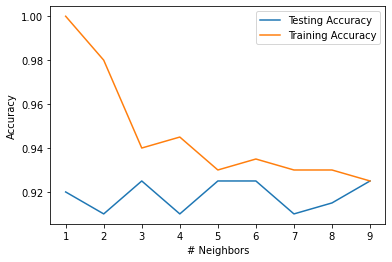

In [41]:
# Generate plot
plt.plot(neighbors, test_acc, label = 'Testing Accuracy')
plt.plot(neighbors, train_acc, label = 'Training Accuracy')
  
plt.legend()
plt.xlabel('# Neighbors')
plt.ylabel('Accuracy')
plt.show()

Let's make a confusion matrix once again to get more insight on our performance on KNN. Similar to the confusion matrix for logistic regression, there are a lot more data for class 1 compared to class 0. Also again, 0's are being predicted as 1's more often than they are classified correctly whereas 1's are mostly being predicted correctly.

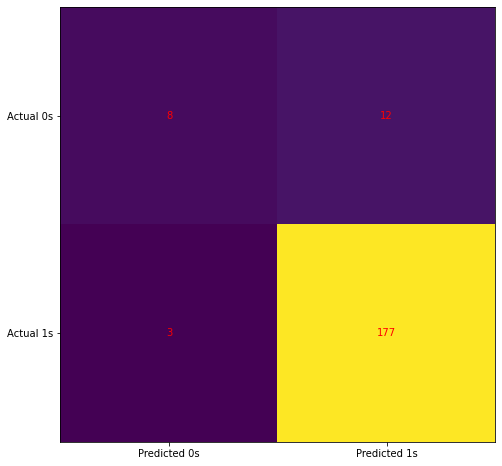

Accuracy: 


0.925

In [42]:
cm = confusion_matrix(yTest, best_knn.predict(XTest))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print("Accuracy: ")
best_knn.score(XTest, yTest)

In [43]:
best_k

3

# Decision Tree Classifier
We also decided to apply the Decision Tree Classification model to our data set as well, another form of binary classification. In order to use this model we imported the DecisionTreeClassifier object also found in the sklearn libraries, specifically sklearn.tree. 
After creating the classifier object and fitting it to our training data, we created our predictions by applying this model to the allocated testing data. 

A more detailed decsription of Decision Tree Classification can be found at:

https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575

     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
209        301          104                  3  3.5  4.0  8.12         1
280        311          102                  3  4.5  4.0  8.64         1
33         340          114                  5  4.0  4.0  9.60         1
210        325          108                  4  4.5  4.0  9.06         1
93         301           97                  2  3.0  3.0  7.88         1
..         ...          ...                ...  ...  ...   ...       ...
340        312          107                  3  3.0  3.0  8.46         1
337        332          118                  5  5.0  5.0  9.47         1
354        297           98                  2  2.5  3.0  7.67         0
334        312          107                  4  4.5  4.0  8.65         1
302        322          105                  2  3.0  3.0  8.45         1

[200 rows x 7 columns]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

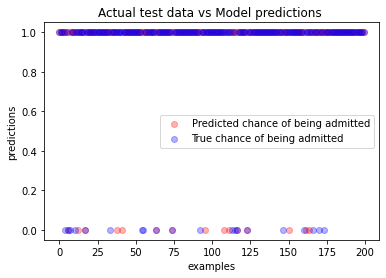

In [44]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns


print(XTest)

print(yTrain)
# create a classifier object
DTC = DecisionTreeClassifier() 
# fit the model
DTC.fit(XTrain,yTrain)
# predict the values for test data
pred2 = DTC.predict(XTest)

# Regression Score of the model
print('Score For Train Data : {}'.format(DTC.score(XTrain,yTrain)))
print('Score For Test Data : {}'.format(DTC.score(XTest,yTest)))

print('The mean absolute error:', metrics.mean_absolute_error(yTest, pred2))
print('The mean squared error:', metrics.mean_squared_error(yTest, pred2))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(yTest, pred2)))
print('\n')

# Plot showacasing the how well model fitted on testing data
# sns.scatterplot(x=yTest, y=pred2)


indices = range(0, len(pred2))

# Plot to compare the model's predicted probabilities vs. the data's given probabilities. 

plt.scatter(indices, pred2, color = "red", label = "Predicted chance of being admitted", alpha = 0.3)
plt.scatter(indices, yTest, color = "blue", label = "True chance of being admitted", alpha = 0.3)
plt.xlabel('examples')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.legend()
plt.show()



Based on the trained models we can compare the test accuracy for each form of binary classification. Logistic Regression concluded with 94.377% accuracy on predicting the test data, K-Nearest Neighbors ended with 93.125%, and the Decision Tree with 90.625%. Though Decision Trees tend to have better accuracy by splitting features, they can also be prone to overfitting, especially with data that has a large number of features and less entries. In our case the features sport a linear trend, higher scores were indicative of higher chance of getting in, so it makes sense that Linear Regression sported the best results.

# Additional Considerations for Machine Learning in the University Admissions Process
Another example of using machine learning in the admissions process is predicting how likely different students are to enroll after being admitted. Universities must determine how many students to admit by factoring in an expected number of students who will decline admissions. Previous works have focused on developing models to predict admitted students' commitment decisions. To learn more about this approach, visit https://doi.org/10.3390/data4020065.

An important factor to consider when evaluating models applied to this topic is fairness in machine learning. Diversity and bias in university admissions has been a hot topic for many years now. University admissions is largely a human decision process, with an admissions officer at each university reading applications and ultimately deciding yes or no. Any model that will predict admissions will be trained on historical data that relies on the biases of admissions officers. A model will learn these biases and trends. If a biased model is used on the admissions office end to make decisions, it will reinforce these biases in who will be admitted. If a biased model is used on the applicant end to determine which schools to apply to, this may eforce a cycle that recommends certain groups of people apply to and therefor attend ceratin categories of schools, also reinforceing the biases in the system. This is an ongoing challenge in machine learning that many in the field are working to address. Read about two current projects at the University of Maryland aimed at improving fairness in AI used for admissions and language translation here: https://ischool.umd.edu/news/improving-fairness-and-trust-in-ai-used-for-college-admissions-and-language-translation/.
